In [1]:
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import PyPDFLoader

In [2]:
path = './SourceData/azure-openai-docs.pdf'
loader = PyPDFLoader(path)

In [3]:
pages = loader.load_and_split()

In [4]:
pages[0]

Document(page_content="Tell us about y our PDF experience.\nOVERVIEW\nWhat is Azur e OpenAI Ser vice?QUICKSTART\nQuickstar ts\nHOW-TO GUIDE\nCreate a resour ceTUTORIAL\nEmbeddings\nHOW-TO GUIDE\nCompletionsTRAINING\nIntro to Azur e OpenAI training\nCONCEPT\nAzur e OpenAI Models\nREFERENCE\nSuppor t and help options\nAdditional resources\nAzur e OpenAI\nAzure OpenAI S tudio \nRegion support \nQuotas and limits\nApply for access to Azure OpenAI \nVideo\nCombining OpenAI models with the power of AzureAzure OpenAI Service Documentation\nLearn how to use Azure OpenAI's powerful language models including the GPT-3, Codex and\nEmbeddings model series for content generation, summarization, semantic search, and natural\nlanguage to code translation.", metadata={'source': './SourceData/azure-openai-docs.pdf', 'page': 0})

In [5]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

In [6]:
tiktoken.encoding_for_model('gpt-3.5-turbo')

<Encoding 'cl100k_base'>

In [7]:
pages[0].page_content

"Tell us about y our PDF experience.\nOVERVIEW\nWhat is Azur e OpenAI Ser vice?QUICKSTART\nQuickstar ts\nHOW-TO GUIDE\nCreate a resour ceTUTORIAL\nEmbeddings\nHOW-TO GUIDE\nCompletionsTRAINING\nIntro to Azur e OpenAI training\nCONCEPT\nAzur e OpenAI Models\nREFERENCE\nSuppor t and help options\nAdditional resources\nAzur e OpenAI\nAzure OpenAI S tudio \nRegion support \nQuotas and limits\nApply for access to Azure OpenAI \nVideo\nCombining OpenAI models with the power of AzureAzure OpenAI Service Documentation\nLearn how to use Azure OpenAI's powerful language models including the GPT-3, Codex and\nEmbeddings model series for content generation, summarization, semantic search, and natural\nlanguage to code translation."

In [8]:
token_counts = [tiktoken_len(doc.page_content) for doc in pages]

In [9]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 13
Avg: 306
Max: 630


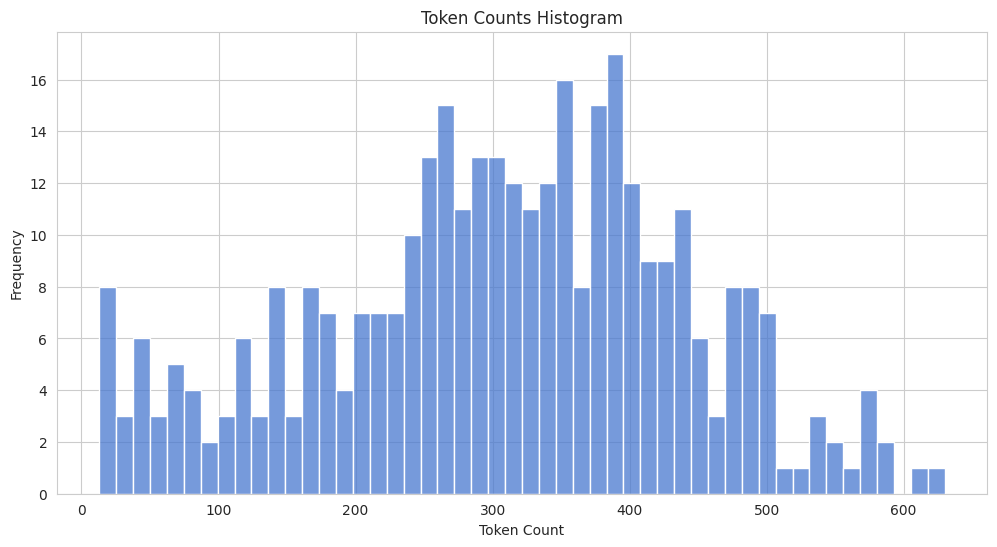

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,  # number of tokens overlap between chunks
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)

In [12]:
chunks = text_splitter.split_text(pages[5].page_content)
len(chunks)

1

In [13]:
tiktoken_len(chunks[0])

281

In [14]:
import hashlib
m = hashlib.md5()  # this will convert URL into unique ID

path = "https://learn.microsoft.com/en-us/azure/cognitive-services/openai/overview"
print(path)

url = pages[5].metadata['source']

# convert URL to unique ID
m.update(url.encode('utf-8'))
uid = m.hexdigest()[:12]
print(uid)

https://learn.microsoft.com/en-us/azure/cognitive-services/openai/overview
b947311d1592


In [15]:
data = [
    {
        'id': f'{uid}-{i}',
        'text': chunk,
        'source': path
    } for i, chunk in enumerate(chunks)
]
data

[{'id': 'b947311d1592-0',
  'text': "responds with a text completion. This completion is the model’s continuation of the\ninput text.\nWhile these models are extremely powerful, their behavior is also very sensitive to the\nprompt. This makes prompt engineering  an important skill to develop.\nPrompt construction can be difficult. In practice, the prompt acts to configure the model\nweights to complete the desired task, but it's more of an art than a science, often\nrequiring experience and intuition to craft a successful prompt.\nThe service provides users access to several different models. Each model provides a\ndifferent capability and price point.\nGPT-4 models are the latest available models. Due to high demand access to this model\nseries is currently only available by request. T o request access, existing Azure OpenAI\ncustomers can apply by filling out this form\nThe GPT-3 base models are known as Davinci, Curie, Babbage, and Ada in decreasing\norder of capability and increasi

In [16]:
from tqdm.auto import tqdm

documents = []


for doc in tqdm(pages):
    path =  "https://learn.microsoft.com/en-us/azure/cognitive-services/openai/overview"
    url = doc.metadata['source']
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': path
        })

len(documents)

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 349/349 [00:00<00:00, 1412.05it/s]


454

In [17]:
import json

with open('TrainData/azure_train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

In [18]:
docs = text_splitter.split_documents(pages)
docs[0]

Document(page_content="Tell us about y our PDF experience.\nOVERVIEW\nWhat is Azur e OpenAI Ser vice?QUICKSTART\nQuickstar ts\nHOW-TO GUIDE\nCreate a resour ceTUTORIAL\nEmbeddings\nHOW-TO GUIDE\nCompletionsTRAINING\nIntro to Azur e OpenAI training\nCONCEPT\nAzur e OpenAI Models\nREFERENCE\nSuppor t and help options\nAdditional resources\nAzur e OpenAI\nAzure OpenAI S tudio \nRegion support \nQuotas and limits\nApply for access to Azure OpenAI \nVideo\nCombining OpenAI models with the power of AzureAzure OpenAI Service Documentation\nLearn how to use Azure OpenAI's powerful language models including the GPT-3, Codex and\nEmbeddings model series for content generation, summarization, semantic search, and natural\nlanguage to code translation.", metadata={'source': './SourceData/azure-openai-docs.pdf', 'page': 0})

In [19]:
documents = []

with open('TrainData/azure_train.jsonl', 'r') as f:
    for line in f:
        documents.append(json.loads(line))

len(documents)

454

In [20]:
documents[0]

{'id': 'ef4ae6fa7b61-0',
 'text': "Tell us about y our PDF experience.\nOVERVIEW\nWhat is Azur e OpenAI Ser vice?QUICKSTART\nQuickstar ts\nHOW-TO GUIDE\nCreate a resour ceTUTORIAL\nEmbeddings\nHOW-TO GUIDE\nCompletionsTRAINING\nIntro to Azur e OpenAI training\nCONCEPT\nAzur e OpenAI Models\nREFERENCE\nSuppor t and help options\nAdditional resources\nAzur e OpenAI\nAzure OpenAI S tudio \nRegion support \nQuotas and limits\nApply for access to Azure OpenAI \nVideo\nCombining OpenAI models with the power of AzureAzure OpenAI Service Documentation\nLearn how to use Azure OpenAI's powerful language models including the GPT-3, Codex and\nEmbeddings model series for content generation, summarization, semantic search, and natural\nlanguage to code translation.",
 'source': 'https://learn.microsoft.com/en-us/azure/cognitive-services/openai/overview'}

In [21]:
from langchain.embeddings import HuggingFaceEmbeddings
hf_embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-mpnet-base-v2"
)

In [59]:
from langchain.vectorstores import Qdrant
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
import os

In [46]:
qdrant_host = os.getenv('QDRANT_HOST') or '127.0.0.1'
qdrant_port = os.getenv('QDRANT_PORT') or "6333"

qudrant_url = f"http://{qdrant_host}:{qdrant_port}"



In [71]:
collection_name = "AzureOpenai"

In [52]:
qdrant_client = QdrantClient(qdrant_host, port=qdrant_port)

In [72]:
doc_store = Qdrant(
    client=qdrant_client, collection_name=collection_name, 
    embeddings=hf_embeddings,
)

In [60]:
qdrant_client.recreate_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=768, distance=Distance.DOT),
)

True

In [61]:

qdrant = Qdrant(qdrant_client, collection_name, hf_embeddings)

In [62]:
qdrant.add_documents(
    docs
)

['3f37f33ec50d42af84445d1ff6e23129',
 'd458e009325f42e8808fd4fce00b34c7',
 '5f27d27c8ca949c7a9ec40a55a51bc5d',
 '3290dbd5b7414fa8a52ded57c578edbc',
 '4963417c8b1246d19c15234f5bcdd2e3',
 'dd05e4e8e1a543169ee48b4b445f7b0e',
 '00db443a83ce41d2a27c3d6bcb32d24d',
 '8c3ee9f2276f4c9c9536029b88861ab1',
 '5cca364aa87643ce816bd6dfbe2f8cd8',
 'ccd0ed7d13994494b9663c579c54ec65',
 '037999a88ac246d1a0f9ac3abe107585',
 '8184c6eb84b444afad8d3092b98d0cb7',
 '67765bd9974e4a64b0baaa9b6a8ddfe3',
 'c857cf96b8054a66b3302148bb0c60ee',
 'ae1cdcf8eb3342779e331a6045ff0ffe',
 'c94c5d39b3794b4d960e728e8d7e5d20',
 'e1284dbb4c4140f09b6b12c38f6164ed',
 '8ac654c2756644d9abed0ef4265bc8aa',
 '47fbe88891ea426cb6949bdf71b44d36',
 'bf3ad3e5f5cd4680bf299b06d87b2125',
 'b1bc4564adaf45b08439d2ba2d1cbac4',
 '0de2de1033bd494bb37859713b34672b',
 'e02cb8f6ed754dbbad8150922ce9d3fd',
 '81cfe2f00e614df2a0c90f5c6f184d10',
 'caaee84fba614a258afd9256dd09550d',
 'a8a053bd33f8412886ee5063ba7db5e3',
 'c83939a5fef74722b94b0a8dc4b1240f',
 

In [65]:
from langchain.chat_models import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.chains import RetrievalQA
import os
from dotenv import load_dotenv

load_dotenv()

True

In [75]:
deployment_name = os.getenv('AZURE_DEPLOYMENT_NAME')

# chat completion llm
llm = ChatOpenAI(
    model_name='gpt-3.5-turbo',
    temperature=0.0,
    deployment_id = deployment_name
)
# conversational memory
conversational_memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=5,
    return_messages=True
)
# retrieval qa chain
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=doc_store.as_retriever()
)

WARNING! deployment_id is not default parameter.
                    deployment_id was transferred to model_kwargs.
                    Please confirm that deployment_id is what you intended.


In [76]:
query = "What is Azure OpenAI Service?"

qa.run(query)

"Azure OpenAI Service is a service provided by Microsoft Azure that gives users access to OpenAI's language models, including the GPT-3, Codex, and Embeddings model series. It also includes the new GPT-4 and ChatGPT (gpt-35-turbo) model series. These models can be used for tasks such as content generation, summarization, semantic search, and natural language to code translation. Users can access the service through REST APIs, Python SDK, or a web-based interface in the Azure OpenAI Studio. The service also includes features such as virtual network support, private link support, and managed identity via Azure Active Directory."

In [77]:
sample_questions = [
"What is Azure OpenAI Service?",
"Difference between Azure OpenAI and OpenAI",
"What are limits and quotas for Azure OpenAI",
"How many and what models are available Azure OpenAI",
"Does Azure OpenAI support GPT-4?"
]

In [79]:
for question in sample_questions:
    print(">",question)
    print(qa.run(question),end="\n\n")

> What is Azure OpenAI Service?
Azure OpenAI Service is a service provided by Microsoft Azure that gives users access to OpenAI's language models, including the GPT-3, Codex, and Embeddings model series. It also includes the new GPT-4 and ChatGPT (gpt-35-turbo) model series. These models can be used for tasks such as content generation, summarization, semantic search, and natural language to code translation. Users can access the service through REST APIs, Python SDK, or a web-based interface in the Azure OpenAI Studio. The service also includes features such as virtual network support, private link support, and managed identity via Azure Active Directory.

> Difference between Azure OpenAI and OpenAI
Azure OpenAI is a service provided by Microsoft that gives customers access to OpenAI's language models, including GPT-3, Codex, and DALL-E, with the added security and enterprise promise of Microsoft Azure. Azure OpenAI co-develops the APIs with OpenAI, ensuring compatibility and a smoot

In [80]:
from langchain.agents import Tool

tools = [
    Tool(
        name='Knowledge Base',
        func=qa.run,
        description=(
            'use this tool when answering queries about azure openai documentation to get '
            'more information about the topic'
        )
    )
]

In [107]:
from langchain.agents import initialize_agent

agent = initialize_agent(
    agent='chat-conversational-react-description',
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3,
    early_stopping_method='generate',
    memory=conversational_memory
)

In [108]:
import json

In [109]:
def getResponse(query):
    response = agent(query)
    print(">",response['input'])
    print(response['output'])

In [110]:
getResponse("What is OpenAI")



> Entering new  chain...
```json
{
    "action": "Knowledge Base",
    "action_input": "What is OpenAI?"
}
```
Observation: OpenAI is a research organization that focuses on developing artificial intelligence in a safe and beneficial way. They work on developing advanced language models, such as GPT-3 and GPT-4, which can be used for tasks such as content generation, summarization, semantic search, and natural language to code translation. Azure OpenAI Service provides REST API access to OpenAI's language models.
Thought:```json
{
    "action": "Final Answer",
    "action_input": "OpenAI is a research organization that focuses on developing artificial intelligence in a safe and beneficial way. They work on developing advanced language models, such as GPT-3 and GPT-4, which can be used for tasks such as content generation, summarization, semantic search, and natural language to code translation. Azure OpenAI Service provides REST API access to OpenAI's language models."
}
```

> Finis

In [111]:
getResponse("What is Azure OpenAI")



> Entering new  chain...
```json
{
    "action": "Knowledge Base",
    "action_input": "Azure OpenAI"
}
```
Observation: Azure OpenAI Service is a service provided by Microsoft that allows users to access OpenAI's language models, including the GPT-3, Codex, and Embeddings model series. It also includes the new GPT-4 and ChatGPT (gpt-35-turbo) model series. These models can be used for tasks such as content generation, summarization, semantic search, and natural language to code translation. Users can access the service through REST APIs, Python SDK, or a web-based interface in the Azure OpenAI Studio. It also includes features such as virtual network support, managed identity, and content filtering.
Thought:```json
{
    "action": "Final Answer",
    "action_input": "Azure OpenAI Service is a service provided by Microsoft that allows users to access OpenAI's language models, including the GPT-3, Codex, and Embeddings model series. It also includes the new GPT-4 and ChatGPT (gpt-35-t

In [112]:
getResponse("How can I use GPT-3 model of Azure OpenAI")



> Entering new  chain...


Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='acchackathonopenai01.openai.azure.com', port=443): Read timed out. (read timeout=600).


{
    "action": "Knowledge Base",
    "action_input": "How can I use GPT-3 model of Azure OpenAI?"
}
Observation: The article mentions that GPT-4 models are currently only available by request, but GPT-3 models are available for use. To use the GPT-3 model, you need to have an Azure subscription and access to Azure OpenAI in that subscription. You can apply for access to Azure OpenAI by completing the form at https://aka.ms/oai/access. Once you have access, you can navigate to Azure OpenAI Studio at https://oai.azure.com/ and sign in with credentials that have access to your OpenAI resource. From the Azure OpenAI Studio landing page, select Chat playground to start experimenting with the GPT-3 model. Additionally, the article provides a Python code snippet that demonstrates how to use the Chat Completion API to interact with the GPT-3 model.
Thought:{
    "action": "Final Answer",
    "action_input": "To use the GPT-3 model of Azure OpenAI, you need to have an Azure subscription and ac